In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [6]:
with open('p25_tauuo_thetao_zos.pkl', 'rb') as f:
    [lat_SAN, lat_SAS, lon_SAW, lon_SAE, lat_TSN, lat_TSS, lon_TSW, lon_TSE,
    tauuo_SA, thetao_SA, thetao_TS, zos_TS, plot_list] = \
    pickle.load(f)

print(plot_list)

['ACCESS1-0', 'ACCESS1-3', 'CMCC-CMS', 'CMCC-CM', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'HadGEM2-AO', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC-ESM-CHEM', 'MIROC-ESM', 'MPI-ESM-MR', 'MRI-CGCM3', 'MRI-ESM1', 'NorESM1-M']


In [7]:
script_name = nb_name[:-6]
print(script_name)
figures_path = '/home/561/erd561/figures/CMIP5/'

hist_thetao_path = '/g/data/e14/erd561/CMIP5/camelia/historical/mon/ocean/thetao/latest/'
hist_tauuo_path = '/g/data/e14/erd561/CMIP5/bromeliad/historical/mon/ocean/tauuo/latest/'
hist_zos_path = '/g/data/e14/erd561/CMIP5/bromeliad/historical/mon/ocean/zos/latest/'
hist_thetao_list = sorted(os.listdir(hist_thetao_path))
hist_tauuo_list = sorted(os.listdir(hist_tauuo_path))
hist_zos_list = sorted(os.listdir(hist_zos_path))

rcp85_thetao_path = '/g/data/e14/erd561/CMIP5/camelia/rcp85/mon/ocean/thetao/latest/'
rcp85_tauuo_path = '/g/data/e14/erd561/CMIP5/bromeliad/rcp85/mon/ocean/tauuo/latest/'
rcp85_zos_path = '/g/data/e14/erd561/CMIP5/bromeliad/rcp85/mon/ocean/zos/latest/'
rcp85_thetao_list = sorted(os.listdir(rcp85_thetao_path))
rcp85_tauuo_list = sorted(os.listdir(rcp85_tauuo_path))
rcp85_zos_list = sorted(os.listdir(rcp85_zos_path))


p24_MMM_scatter_pub


In [8]:
thetao_hist = {}
thetao_rcp85 = {}
thetao_anom = {}
thetao_lat = {}
thetao_lon = {}

tauuo_hist = {}
tauuo_rcp85 = {}
tauuo_anom = {}
tauuo_lat = {}
tauuo_lon = {}

zos_hist = {}
zos_rcp85 = {}
zos_anom = {}
zos_lat = {}
zos_lon = {}

print(plot_list)
for model in plot_list:
    print(model)
    # These models are hard to deal with:
    # MIROC5 and inmcm4 have a crazy rotated grid
    # MPI-ESM-LR has a weird grid too
    if model in ['MIROC5', 'MPI-ESM-LR', 'inmcm4']:
        continue
        
    if model in ['CESM1-WACCM']:
        r = '2'
    else:
        r = '1'
    thetao_rcp85_data = xr.open_dataset(
        rcp85_thetao_path + model + '_r' + r + 'i1p1_2080-2099mean_surf.nc', decode_times=False)
    tauuo_rcp85_data = xr.open_dataset(
        rcp85_tauuo_path + model + '_r' + r + 'i1p1_2080-2099mean.nc', decode_times=False)
    if model not in ['GFDL-CM3', 'HadGEM2-AO']:
        zos_rcp85_data = xr.open_dataset(
            rcp85_zos_path + model + '_r' + r + 'i1p1_2080-2099mean.nc', decode_times=False)*100
    
    if model in ['CESM1-WACCM']:
        r = '1'
    else:
        r = '1'
    thetao_hist_data = xr.open_dataset(
        hist_thetao_path + model + '_r' + r + 'i1p1_1980-1999mean_surf.nc', decode_times=False)
    
    if model in ['EC-EARTH']:
        r = '2'
    tauuo_hist_data = xr.open_dataset(
        hist_tauuo_path + model + '_r' + r + 'i1p1_1980-1999mean.nc', decode_times=False)
    
    if model not in ['GFDL-CM3', 'HadGEM2-AO']:
        zos_hist_data = xr.open_dataset(
            hist_zos_path + model + '_r' + r + 'i1p1_1980-1999mean.nc', decode_times=False)*100
    
    thetao_hist[model] = thetao_hist_data['thetao'][0,0,:,:]
    thetao_rcp85[model] = thetao_rcp85_data['thetao'][0,0,:,:]
    tauuo_hist[model] = tauuo_hist_data['tauuo'][0,:,:]
    tauuo_rcp85[model] = tauuo_rcp85_data['tauuo'][0,:,:]
    if model not in ['GFDL-CM3', 'HadGEM2-AO']:
        zos_hist[model] = zos_hist_data['zos'][0,:,:]
        zos_rcp85[model] = zos_rcp85_data['zos'][0,:,:]
    thetao_anom[model] = thetao_rcp85[model]-thetao_hist[model]
    tauuo_anom[model] = tauuo_rcp85[model]-tauuo_hist[model]
    if model not in ['GFDL-CM3', 'HadGEM2-AO']:
        zos_anom[model] = zos_rcp85[model]-zos_hist[model]
    
    if len(thetao_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            thetao_lat[model] = thetao_hist_data['lat'][:,0]
            thetao_lon[model] = thetao_hist_data['lon'][-1,:]
        else:
            thetao_lat[model] = thetao_hist_data['lat'][:,0]
            thetao_lon[model] = thetao_hist_data['lon'][0,:]
    else:
        thetao_lat[model] = thetao_hist_data['lat'][:]
        thetao_lon[model] = thetao_hist_data['lon'][:]
        
    if len(tauuo_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            tauuo_lat[model] = tauuo_hist_data['lat'][:,0]
            tauuo_lon[model] = tauuo_hist_data['lon'][-1,:]
        else:
            tauuo_lat[model] = tauuo_hist_data['lat'][:,0]
            tauuo_lon[model] = tauuo_hist_data['lon'][0,:]
    else:
        tauuo_lat[model] = tauuo_hist_data['lat'][:]
        tauuo_lon[model] = tauuo_hist_data['lon'][:]
        
    if model not in ['GFDL-CM3', 'HadGEM2-AO']:
        if len(zos_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
            if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
                zos_lat[model] = zos_hist_data['lat'][:,0]
                zos_lon[model] = zos_hist_data['lon'][-1,:]
            else:
                zos_lat[model] = zos_hist_data['lat'][:,0]
                zos_lon[model] = zos_hist_data['lon'][0,:]
        else:
            zos_lat[model] = zos_hist_data['lat'][:]
            zos_lon[model] = zos_hist_data['lon'][:]
    
    # The GFDL models run need this lon offset fix ...
    if model in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M']:
        thetao_lon[model][0:280] += 360
        tauuo_lon[model][0:280] += 360
        if model not in ['GFDL-CM3', 'HadGEM2-AO']:
            zos_lon[model][0:280] += 360
    
    # Also, MPI-ESM-LR and MPI-ESM-MR are flipped upside down...
    # Couldn't find a flip function in xarray...
    if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
        thetao_anom_now = thetao_anom[model]
        thetao_anom[model] = np.flipud(thetao_anom_now)
        tauuo_anom_now = tauuo_anom[model]
        tauuo_anom[model] = np.flipud(tauuo_anom_now)
        zos_anom_now = zos_anom[model]
        zos_anom[model] = np.flipud(zos_anom_now)
        
        thetao_lat_now = thetao_lat[model]
        thetao_lat[model] = np.flipud(thetao_lat_now)
        tauuo_lat_now = tauuo_lat[model]
        tauuo_lat[model] = np.flipud(tauuo_lat_now)
        zos_lat_now = zos_lat[model]
        zos_lat[model] = np.flipud(zos_lat_now)
        
    # HadGEM2-AO, MRI-CGCM3 and MRI-ESM1 need to have their wind stress land masked...
    if model in ['HadGEM2-AO', 'MRI-CGCM3', 'MRI-ESM1', 'EC-EARTH']:
        # anything that satisfies the condition is SAFE
        tauuo_anom[model] = tauuo_anom[model].where((tauuo_anom[model] != 0), np.nan)
    
    # MRI-CGCM3 and MRI-ESM1 need to have their SST land masked...
    if model in ['MRI-CGCM3', 'MRI-ESM1', 'EC-EARTH']:
        thetao_anom[model] = thetao_anom[model].where((thetao_anom[model] != 0), np.nan)
        
    # MRI-CGCM3 and MRI-ESM1 need to have their eta land masked...
    if model in ['MRI-CGCM3', 'MRI-ESM1']:
        zos_anom[model] = zos_anom[model].where((zos_anom[model] != 0), np.nan)
        
    print(model + ' OK!')
        
print(len(plot_list))   

['ACCESS1-0', 'ACCESS1-3', 'CMCC-CMS', 'CMCC-CM', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'HadGEM2-AO', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC-ESM-CHEM', 'MIROC-ESM', 'MPI-ESM-MR', 'MRI-CGCM3', 'MRI-ESM1', 'NorESM1-M']
ACCESS1-0
ACCESS1-0 OK!
ACCESS1-3
ACCESS1-3 OK!
CMCC-CMS
CMCC-CMS OK!
CMCC-CM
CMCC-CM OK!
CNRM-CM5
CNRM-CM5 OK!
CSIRO-Mk3-6-0
CSIRO-Mk3-6-0 OK!
CanESM2
CanESM2 OK!
FGOALS-s2
FGOALS-s2 OK!
GFDL-CM3
GFDL-CM3 OK!
GFDL-ESM2G
GFDL-ESM2G OK!
GFDL-ESM2M
GFDL-ESM2M OK!
HadGEM2-AO
HadGEM2-AO OK!
IPSL-CM5A-LR
IPSL-CM5A-LR OK!
IPSL-CM5A-MR
IPSL-CM5A-MR OK!
IPSL-CM5B-LR
IPSL-CM5B-LR OK!
MIROC-ESM-CHEM
MIROC-ESM-CHEM OK!
MIROC-ESM
MIROC-ESM OK!
MPI-ESM-MR
MPI-ESM-MR OK!
MRI-CGCM3
MRI-CGCM3 OK!
MRI-ESM1
MRI-ESM1 OK!
NorESM1-M
NorESM1-M OK!
21


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.04/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


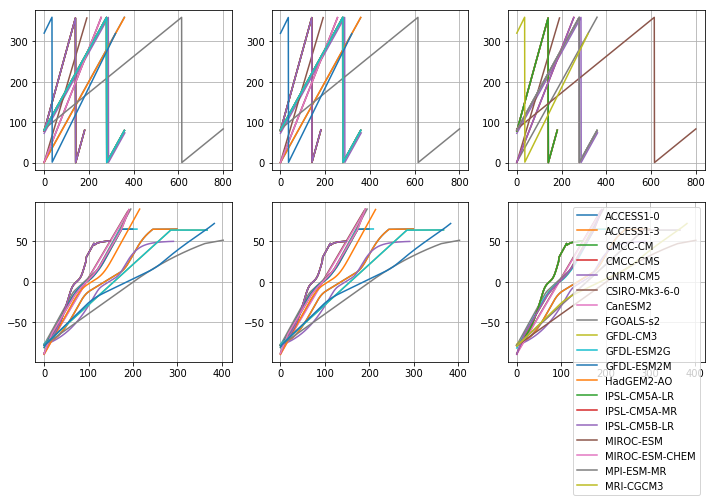

In [31]:
fig = plt.figure() 
fig.set_size_inches(12, 10)

for f in plot_list:
    plt.subplot(3,3,1)
    plt.plot(thetao_lon[f])
    plt.grid()
    
    plt.subplot(3,3,2)
    plt.plot(tauuo_lon[f])
    plt.grid()

    if f not in ['GFDL-CM3', 'HadGEM2-AO']:
        plt.subplot(3,3,3)
        plt.plot(zos_lon[f])
        plt.grid()

    plt.subplot(3,3,4)
    plt.plot(thetao_lat[f])
    plt.grid()
    
    plt.subplot(3,3,5)
    plt.plot(tauuo_lat[f])
    plt.grid()

    if f not in ['GFDL-CM3', 'HadGEM2-AO']:
        plt.subplot(3,3,6)
        plt.plot(zos_lat[f])
        plt.grid()
        plt.legend(plot_list)




ACCESS1-0
ACCESS1-3
CMCC-CM
CMCC-CMS
CNRM-CM5
CSIRO-Mk3-6-0
CanESM2
FGOALS-s2
GFDL-ESM2G
GFDL-ESM2M
IPSL-CM5A-LR
IPSL-CM5A-MR
IPSL-CM5B-LR
MIROC-ESM
MIROC-ESM-CHEM
MPI-ESM-MR
MRI-CGCM3
MRI-ESM1
NorESM1-M


(0.0, 1.0, 0.0, 1.0)

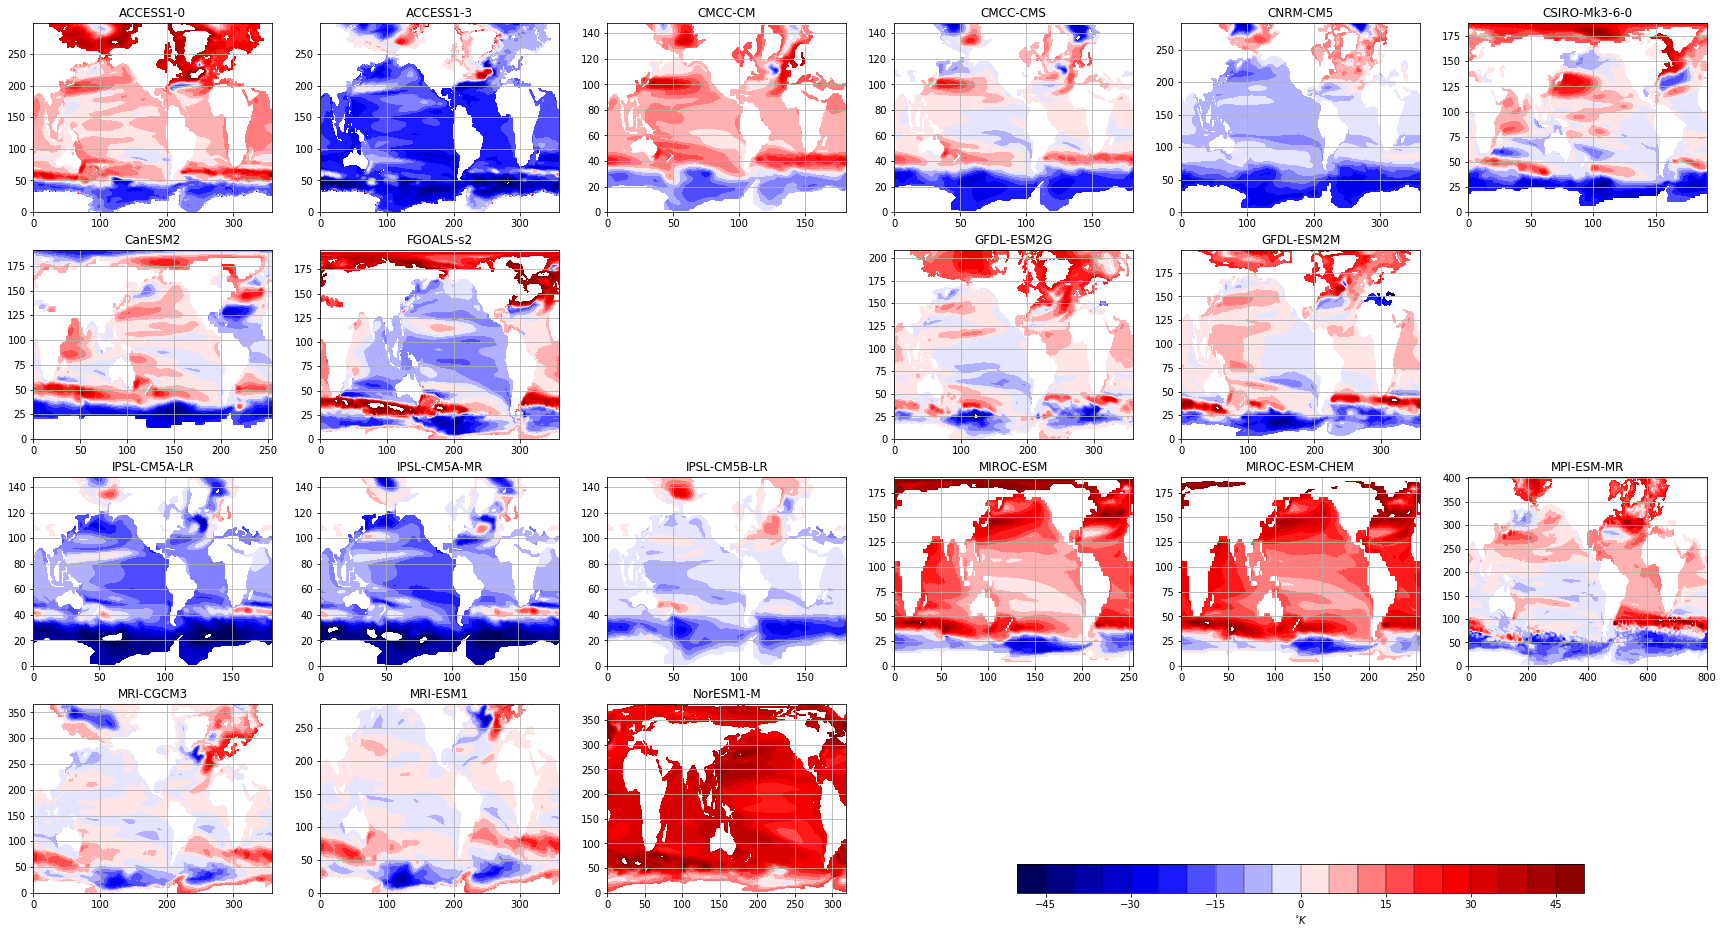

In [18]:
fig = plt.figure() 
fig.set_size_inches(30, 16)

cmap = plt.get_cmap('YlOrRd')
step = 5
contf_lvls = np.arange(-50,50+1e-08,step)

for idx,f in enumerate(plot_list):
    if f not in ['GFDL-CM3', 'HadGEM2-AO']:
        print(f)
        plt.subplot(4,6,idx+1)
        contf = plt.contourf(zos_anom[f], levels=contf_lvls, cmap='seismic')
        plt.title('')
        plt.title(f)
        plt.grid()
ax = plt.subplot2grid((4, 6), (3, 3), colspan=3)
cbar = plt.colorbar(contf, orientation='horizontal', drawedges=True)
cbar.set_label(r'$^{\circ}K$') 
# cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
plt.axis('off')

# output_ls = os.listdir(figures_path)
# if not script_name:
#     script_name = 'test'
# elif script_name not in output_ls:
#     os.mkdir(figures_path + '/' + script_name)
# plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
#             + '_fig2_' + '.png', bbox_inches='tight', dpi=300)

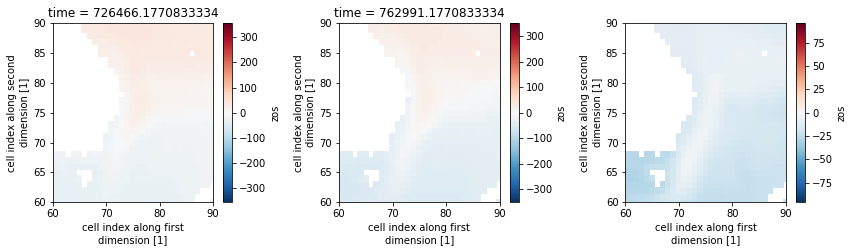

In [99]:
fig = plt.figure()
fig.set_size_inches(12, 4)

model = 'ACCESS1-3'

plt.subplot(1,3,1)
zos_hist[model].plot()
plt.xlim([60, 90])
plt.ylim([60, 90])
plt.subplot(1,3,2)
zos_rcp85[model].plot()
plt.xlim([60, 90])
plt.ylim([60, 90])
plt.subplot(1,3,3)
zos_anom[model].plot()
plt.xlim([60, 90])
plt.ylim([60, 90])

fig.tight_layout(rect=[0, 0, 1, 0.90])

In [7]:
lon_unique = np.arange(100,170)
lat_unique = np.arange(-60,-20)

grid_lon_unique, grid_lat_unique = np.meshgrid(lon_unique,lat_unique)
print(np.shape(grid_lon_unique))

lat_N = -17
lat_S = -63
lon_W = 97
lon_E = 173

thetao_anom_unique = []
tauuo_anom_unique = []

for idx, t in enumerate(plot_list):
    print(t)
    
    thetao_lat_N_idx = find_nearest_index(thetao_lat[t], lat_N)
    thetao_lat_S_idx = find_nearest_index(thetao_lat[t], lat_S)
    thetao_lon_W_idx = find_nearest_index(thetao_lon[t], lon_W)
    thetao_lon_E_idx = find_nearest_index(thetao_lon[t], lon_E)
    thetao_grid_lon_now, thetao_grid_lat_now = np.meshgrid(
        thetao_lon[t][thetao_lon_W_idx:thetao_lon_E_idx], 
        thetao_lat[t][thetao_lat_S_idx:thetao_lat_N_idx])
    print(thetao_grid_lon_now.shape)
    print(thetao_grid_lat_now.shape)
    thetao_lon_flat = np.transpose(thetao_grid_lon_now.flatten('F'))
    thetao_lat_flat = thetao_grid_lat_now.flatten('F')
    thetao_flat_list = [thetao_lon_flat, thetao_lat_flat]    
    thetao_grid_points = np.transpose(thetao_flat_list)
    print(np.shape(thetao_grid_points))
    thetao_anom_now = thetao_anom[t][thetao_lat_S_idx:thetao_lat_N_idx,thetao_lon_W_idx:thetao_lon_E_idx]
    
    tauuo_lat_N_idx = find_nearest_index(tauuo_lat[t], lat_N)
    tauuo_lat_S_idx = find_nearest_index(tauuo_lat[t], lat_S)
    tauuo_lon_W_idx = find_nearest_index(tauuo_lon[t], lon_W)
    tauuo_lon_E_idx = find_nearest_index(tauuo_lon[t], lon_E)
    tauuo_grid_lon_now, tauuo_grid_lat_now = np.meshgrid(
        tauuo_lon[t][tauuo_lon_W_idx:tauuo_lon_E_idx], 
        tauuo_lat[t][tauuo_lat_S_idx:tauuo_lat_N_idx])
    tauuo_lon_flat = np.transpose(tauuo_grid_lon_now.flatten('F'))
    tauuo_lat_flat = tauuo_grid_lat_now.flatten('F')
    tauuo_flat_list = [tauuo_lon_flat, tauuo_lat_flat]    
    tauuo_grid_points = np.transpose(tauuo_flat_list)
    tauuo_anom_now = tauuo_anom[t][tauuo_lat_S_idx:tauuo_lat_N_idx,tauuo_lon_W_idx:tauuo_lon_E_idx]

    if t in ['CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'HadGEM2-AO', 'MIROC-ESM-CHEM', 'MIROC-ESM']:
        thetao_anom_now_flatten = thetao_anom_now.stack(z=('lon', 'lat'))
        tauuo_anom_now_flatten = tauuo_anom_now.stack(z=('lon', 'lat'))
    elif t in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'MRI-CGCM3', 'MRI-ESM1']:
        thetao_anom_now_flatten = thetao_anom_now.stack(z=('rlon', 'rlat'))
        tauuo_anom_now_flatten = tauuo_anom_now.stack(z=('rlon', 'rlat'))
    elif t in ['MPI-ESM-MR']:
        thetao_anom_now_flatten = thetao_anom_now.flatten('F')
        tauuo_anom_now_flatten = tauuo_anom_now.flatten('F')
    else:
        thetao_anom_now_flatten = thetao_anom_now.stack(z=('i', 'j'))
        tauuo_anom_now_flatten = tauuo_anom_now.stack(z=('i', 'j'))
    
    print(np.shape(thetao_anom_now_flatten))
    
    thetao_anom_interp = interpolate.griddata(thetao_grid_points, thetao_anom_now_flatten, 
                                           (grid_lon_unique, grid_lat_unique), 
                                           method='linear')
    tauuo_anom_interp = interpolate.griddata(tauuo_grid_points, tauuo_anom_now_flatten, 
                                           (grid_lon_unique, grid_lat_unique), 
                                           method='linear')
    if idx == 0:
        thetao_anom_unique = thetao_anom_interp
        tauuo_anom_unique = tauuo_anom_interp
    else:
        thetao_anom_unique = np.dstack((thetao_anom_unique, thetao_anom_interp))
        tauuo_anom_unique = np.dstack((tauuo_anom_unique, tauuo_anom_interp)) 
    
print(np.shape(thetao_anom_unique))
print(thetao_anom_unique)


(40, 70)
ACCESS1-0
(53, 76)
(53, 76)
(4028, 2)
(4028,)
ACCESS1-3
(53, 76)
(53, 76)
(4028, 2)
(4028,)
CMCC-CM
(32, 38)
(32, 38)
(1216, 2)
(1216,)
CMCC-CMS
(32, 38)
(32, 38)
(1216, 2)
(1216,)
CNRM-CM5
(65, 76)
(65, 76)
(4940, 2)
(4940,)
CSIRO-Mk3-6-0
(49, 40)
(49, 40)
(1960, 2)
(1960,)
CanESM2
(49, 55)
(49, 55)
(2695, 2)
(2695,)
FGOALS-s2
(46, 76)
(46, 76)
(3496, 2)
(3496,)
GFDL-CM3
(48, 76)
(48, 76)
(3648, 2)
(3648,)
GFDL-ESM2G
(47, 76)
(47, 76)
(3572, 2)
(3572,)
GFDL-ESM2M
(48, 76)
(48, 76)
(3648, 2)
(3648,)
HadGEM2-AO
(47, 76)
(47, 76)
(3572, 2)
(3572,)
IPSL-CM5A-LR
(32, 38)
(32, 38)
(1216, 2)
(1216,)
IPSL-CM5A-MR
(32, 38)
(32, 38)
(1216, 2)
(1216,)
IPSL-CM5B-LR
(32, 38)
(32, 38)
(1216, 2)
(1216,)
MIROC-ESM
(49, 55)
(49, 55)
(2695, 2)
(2695,)
MIROC-ESM-CHEM
(49, 55)
(49, 55)
(2695, 2)
(2695,)
MPI-ESM-MR
(118, 169)
(118, 169)
(19942, 2)
(19942,)
MRI-CGCM3
(92, 76)
(92, 76)
(6992, 2)
(6992,)
MRI-ESM1
(92, 76)
(92, 76)
(6992, 2)
(6992,)
NorESM1-M
(94, 68)
(94, 68)
(6392, 2)
(6392,)
(40, 

In [8]:
lon_unique = np.arange(100,170)
lat_unique = np.arange(-60,-20)

grid_lon_unique, grid_lat_unique = np.meshgrid(lon_unique,lat_unique)
print(np.shape(grid_lon_unique))

lat_N = -17
lat_S = -63
lon_W = 97
lon_E = 173

zos_anom_unique = []

for idx, t in enumerate(plot_list):
    if t not in ['GFDL-CM3', 'HadGEM2-AO']:
        print(t)

        zos_lat_N_idx = find_nearest_index(zos_lat[t], lat_N)
        zos_lat_S_idx = find_nearest_index(zos_lat[t], lat_S)
        zos_lon_W_idx = find_nearest_index(zos_lon[t], lon_W)
        zos_lon_E_idx = find_nearest_index(zos_lon[t], lon_E)
        zos_grid_lon_now, zos_grid_lat_now = np.meshgrid(
            zos_lon[t][zos_lon_W_idx:zos_lon_E_idx], 
            zos_lat[t][zos_lat_S_idx:zos_lat_N_idx])
        print(zos_grid_lon_now.shape)
        print(zos_grid_lat_now.shape)
        zos_lon_flat = np.transpose(zos_grid_lon_now.flatten('F'))
        zos_lat_flat = zos_grid_lat_now.flatten('F')
        zos_flat_list = [zos_lon_flat, zos_lat_flat]    
        zos_grid_points = np.transpose(zos_flat_list)
        print(np.shape(zos_grid_points))
        zos_anom_now = zos_anom[t][zos_lat_S_idx:zos_lat_N_idx,zos_lon_W_idx:zos_lon_E_idx]

        if t in ['CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'HadGEM2-AO', 'MIROC-ESM-CHEM', 'MIROC-ESM']:
            zos_anom_now_flatten = zos_anom_now.stack(z=('lon', 'lat'))
        elif t in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'MRI-CGCM3', 'MRI-ESM1']:
            zos_anom_now_flatten = zos_anom_now.stack(z=('rlon', 'rlat'))
        elif t in ['MPI-ESM-MR']:
            zos_anom_now_flatten = zos_anom_now.flatten('F')
        else:
            zos_anom_now_flatten = zos_anom_now.stack(z=('i', 'j'))

        print(np.shape(zos_anom_now_flatten))

        zos_anom_interp = interpolate.griddata(zos_grid_points, zos_anom_now_flatten, 
                                               (grid_lon_unique, grid_lat_unique), 
                                               method='linear')
        if idx == 0:
            zos_anom_unique = zos_anom_interp
        else:
            zos_anom_unique = np.dstack((zos_anom_unique, zos_anom_interp))
    
print(np.shape(zos_anom_unique))
print(zos_anom_unique)



(40, 70)
ACCESS1-0
(53, 76)
(53, 76)
(4028, 2)
(4028,)
ACCESS1-3
(53, 76)
(53, 76)
(4028, 2)
(4028,)
CMCC-CM
(32, 38)
(32, 38)
(1216, 2)
(1216,)
CMCC-CMS
(32, 38)
(32, 38)
(1216, 2)
(1216,)
CNRM-CM5
(65, 76)
(65, 76)
(4940, 2)
(4940,)
CSIRO-Mk3-6-0
(49, 40)
(49, 40)
(1960, 2)
(1960,)
CanESM2
(49, 55)
(49, 55)
(2695, 2)
(2695,)
FGOALS-s2
(46, 76)
(46, 76)
(3496, 2)
(3496,)
GFDL-ESM2G
(47, 76)
(47, 76)
(3572, 2)
(3572,)
GFDL-ESM2M
(48, 76)
(48, 76)
(3648, 2)
(3648,)
IPSL-CM5A-LR
(32, 38)
(32, 38)
(1216, 2)
(1216,)
IPSL-CM5A-MR
(32, 38)
(32, 38)
(1216, 2)
(1216,)
IPSL-CM5B-LR
(32, 38)
(32, 38)
(1216, 2)
(1216,)
MIROC-ESM
(49, 55)
(49, 55)
(2695, 2)
(2695,)
MIROC-ESM-CHEM
(49, 55)
(49, 55)
(2695, 2)
(2695,)
MPI-ESM-MR
(118, 169)
(118, 169)
(19942, 2)
(19942,)
MRI-CGCM3
(92, 76)
(92, 76)
(6992, 2)
(6992,)
MRI-ESM1
(92, 76)
(92, 76)
(6992, 2)
(6992,)
NorESM1-M
(94, 68)
(94, 68)
(6392, 2)
(6392,)
(40, 70, 19)
[[[-1.93124421e+01 -4.31993401e+01 -1.74042183e+01 ... -7.57661438e+00
   -9.3799285

lat: -60
lat: -59
lat: -58
lat: -57
lat: -56
lat: -55
lat: -54
lat: -53
lat: -52
lat: -51
lat: -50
lat: -49
lat: -48
lat: -47
lat: -46
lat: -45
lat: -44
lat: -43
lat: -42
lat: -41
lat: -40
lat: -39
lat: -38
lat: -37
lat: -36
lat: -35
lat: -34
lat: -33
lat: -32
lat: -31
lat: -30
lat: -29
lat: -28
lat: -27
lat: -26
lat: -25
lat: -24
lat: -23
lat: -22
lat: -21
(40, 70)


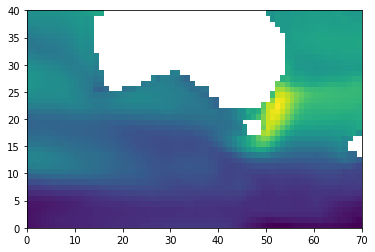

In [9]:
# Criteria for MMM:
good_tol = 12

thetao_anom_MMM = np.empty([40,70])
tauuo_anom_MMM = np.empty([40,70])
for y_idx,y in enumerate(lat_unique):
    print('lat: ' + str(y))
    
    for x_idx, x in enumerate(lon_unique):
        thetao_unique_now = thetao_anom_unique[y_idx][x_idx]
        tauuo_unique_now = tauuo_anom_unique[y_idx][x_idx]
        #print(thetao_unique_now)
        #print(np.shape(thetao_unique_now))
        thetao_idx = np.argwhere(np.isnan(thetao_unique_now))
        tauuo_idx = np.argwhere(np.isnan(tauuo_unique_now))
        #print(idx)
        #print(len(idx))
        if len(thetao_idx) <= good_tol:
            thetao_anom_MMM[y_idx, x_idx] = np.nanmean(thetao_unique_now)
        else:
            thetao_anom_MMM[y_idx, x_idx] = np.mean(thetao_unique_now)
        if len(tauuo_idx) <= good_tol:
            tauuo_anom_MMM[y_idx, x_idx] = np.nanmean(tauuo_unique_now)
        else:
            tauuo_anom_MMM[y_idx, x_idx] = np.mean(tauuo_unique_now)

print(np.shape(thetao_anom_MMM))
plt.pcolor(thetao_anom_MMM)

lat: -60
lat: -59
lat: -58
lat: -57
lat: -56
lat: -55
lat: -54
lat: -53
lat: -52
lat: -51
lat: -50
lat: -49
lat: -48
lat: -47
lat: -46
lat: -45
lat: -44
lat: -43
lat: -42
lat: -41
lat: -40
lat: -39
lat: -38
lat: -37
lat: -36
lat: -35
lat: -34
lat: -33
lat: -32
lat: -31
lat: -30
lat: -29
lat: -28
lat: -27
lat: -26
lat: -25
lat: -24
lat: -23
lat: -22
lat: -21
(40, 70)


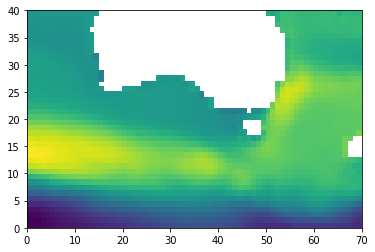

In [10]:
# Criteria for MMM:
good_tol = 7

zos_anom_MMM = np.empty([40,70])
for y_idx,y in enumerate(lat_unique):
    print('lat: ' + str(y))
    
    for x_idx, x in enumerate(lon_unique):
        zos_unique_now = zos_anom_unique[y_idx][x_idx]
        #print(zos_unique_now)
        #print(np.shape(zos_unique_now))
        zos_idx = np.argwhere(np.isnan(zos_unique_now))
        #print(idx)
        #print(len(idx))
        if len(zos_idx) <= good_tol:
            zos_anom_MMM[y_idx, x_idx] = np.nanmean(zos_unique_now)
        else:
            zos_anom_MMM[y_idx, x_idx] = np.mean(zos_unique_now)

print(np.shape(zos_anom_MMM))
plt.pcolor(zos_anom_MMM)

In [11]:
# Calculate global SST anomaly:
global_MMM = {}
for model in SAM_index_sorted_cleaned:
    global_MMM[model] = np.nanmean(thetao_anom[model])
    
print(global_MMM)

{'IPSL-CM5A-MR': 2.892341, 'IPSL-CM5A-LR': 2.9904785, 'GFDL-CM3': 3.3988163, 'FGOALS-s2': 3.256486, 'CMCC-CMS': 2.6834273, 'CMCC-CM': 2.5792053, 'MPI-ESM-MR': 2.2581325, 'GFDL-ESM2M': 1.8187418, 'ACCESS1-0': 2.6896484, 'MIROC-ESM': 3.3338687, 'MIROC-ESM-CHEM': 3.5227914, 'CanESM2': 2.9769533, 'GFDL-ESM2G': 1.7988269, 'ACCESS1-3': 2.75614, 'CSIRO-Mk3-6-0': 2.409726, 'HadGEM2-AO': 2.8746197, 'MRI-ESM1': 2.5726848, 'MRI-CGCM3': 2.1594028, 'NorESM1-M': 1.9738988, 'IPSL-CM5B-LR': 2.1574078, 'CNRM-CM5': 2.5346916}


In [12]:
# Warming pool area:
lon_TS = [148, 157]
lat_TS = [-45, -32]
TS_pool = {}
CS_pool = {}
global_MMM_TS = {}
for idx, t in enumerate(plot_list):
    if t not in ['GFDL-CM3', 'HadGEM2-AO']:
        if t not in ['ACCESS1-3', 'FGOALS-s2', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'NorESM1-M']:
            print(t)
            lat_TSN_idx = find_nearest_index(thetao_lat[t], lat_TS[1])
            lat_TSS_idx = find_nearest_index(thetao_lat[t], lat_TS[0])
            lon_TSW_idx = find_nearest_index(thetao_lon[t], lon_TS[0])
            lon_TSE_idx = find_nearest_index(thetao_lon[t], lon_TS[1])
            TS_pool[t] = np.nanmean(
                thetao_anom[t][lat_TSS_idx:lat_TSN_idx, lon_TSW_idx:lon_TSE_idx])
            print(TS_pool[t])

            lat_CSN_idx = find_nearest_index(zos_lat[t], lat_TS[1])
            lat_CSS_idx = find_nearest_index(zos_lat[t], lat_TS[0])
            lon_CSW_idx = find_nearest_index(zos_lon[t], lon_TS[0])
            lon_CSE_idx = find_nearest_index(zos_lon[t], lon_TS[1])
            CS_pool[t] = np.nanmean(
                zos_anom[t][lat_CSS_idx:lat_CSN_idx, lon_CSW_idx:lon_CSE_idx])
            print(CS_pool[t])
            
            global_MMM_TS[t] = global_MMM[t]


ACCESS1-0
4.5756364
17.38472
CMCC-CM
4.014143
15.904246
CMCC-CMS
4.464762
10.778835
CNRM-CM5
2.8246305
-2.7403111
CSIRO-Mk3-6-0
2.7913005
-0.6159214
CanESM2
5.102937
13.528588
GFDL-ESM2G
1.9167838
3.1291955
GFDL-ESM2M
2.8750927
8.810636
IPSL-CM5B-LR
1.9908178
-1.0918196
MIROC-ESM
4.6365113
20.432617
MIROC-ESM-CHEM
4.70692
25.39473
MPI-ESM-MR
2.6957748
2.3271945
MRI-CGCM3
3.0626915
6.133099
MRI-ESM1
3.1147194
8.116019


In [1]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

row = 4
col = 4
fig = plt.figure()
fig.set_size_inches(7.5,7.5)
matplotlib.rcParams.update({'font.size': 6}) 
marker = itertools.cycle(('v', 'P', 'o')) 


##########################################################################################
ax = plt.subplot2grid((row, col), (1, 0), rowspan=1, colspan=1)
cmap = plt.get_cmap('PRGn')
step = 0.005
contf_lvls = arange(-0.03,0.03,step)               
ax.set_facecolor('gray')
contf = plt.contourf(lon_unique, lat_unique, tauuo_anom_MMM,
                     contf_lvls, cmap=cmap, extend='both')
plot = plt.plot(
    [lon_warmW,lon_warmE,lon_warmE,lon_warmW,lon_warmW], 
    [lat_warmS,lat_warmS,lat_warmN,lat_warmN,lat_warmS], 
    color='k', linestyle='--', linewidth=1)
plt.grid()
ax.set_title(r'a) MMM $\tau^{x}_{a}$ (21)', loc='left')
ax = plt.subplot2grid((row, col), (0, 0), rowspan=1, colspan=1)
ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes("bottom", size="7%", pad="2%")
cbar = plt.colorbar(contf, cax=cax, orientation='horizontal', drawedges=True)
cbar.set_ticks([-0.03, -0.015, 0, 0.015, 0.03])
cbar.set_ticklabels(['-0.03', '-0.015', '0', '0.015', '0.03'])
cbar.set_label(r'$N\ m^{-2}$') 
ax.axis('off')
##########################################################################################


##########################################################################################
ax = plt.subplot2grid((row, col), (1, 1), rowspan=1, colspan=2)
cmap = plt.get_cmap('hot_r')
step = 0.25
contf_lvls = np.arange(1,5+1e-08,step)              
ax.set_facecolor('gray')
contf = plt.contourf(lon_unique, lat_unique, thetao_anom_MMM,
                     contf_lvls, cmap=cmap, extend='both')
plot = plt.plot(
    [lon_warmW,lon_warmE,lon_warmE,lon_warmW,lon_warmW], 
    [lat_warmS,lat_warmS,lat_warmN,lat_warmN,lat_warmS], 
    color='k', linestyle='--', linewidth=1)
plot = plt.plot(
    [lon_TS[0],lon_TS[1],lon_TS[1],lon_TS[0],lon_TS[0]], 
    [lat_TS[0],lat_TS[0],lat_TS[1],lat_TS[1],lat_TS[0]], 
    color='white', linestyle='--', linewidth=1)
plt.grid()
plt.gca().set_yticklabels('')
ax.set_title('b) MMM $SST_{a}$ (21)', loc='left')
ax = plt.subplot2grid((row, col), (0, 1), rowspan=1, colspan=2)
ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes("bottom", size="7%", pad="2%")
cbar = plt.colorbar(contf, cax=cax, orientation='horizontal', drawedges=True)
# cbar.set_ticks([-0.02, -0.01, 0, 0.01, 0.02])
cbar.set_label(r'$^{\circ}C$') 
ax.axis('off')
##########################################################################################


##########################################################################################
ax = plt.subplot2grid((row, col), (1, 3), rowspan=1, colspan=1)
cmap = plt.get_cmap('BrBG')
step = 2.5
contf_lvls = np.arange(-15,15+1e-08,step)               
ax.set_facecolor('gray')
contf = plt.contourf(lon_unique, lat_unique, zos_anom_MMM,
                     contf_lvls, cmap=cmap, extend='both')
plot = plt.plot(
    [lon_TS[0],lon_TS[1],lon_TS[1],lon_TS[0],lon_TS[0]], 
    [lat_TS[0],lat_TS[0],lat_TS[1],lat_TS[1],lat_TS[0]], 
    color='white', linestyle='--', linewidth=1)
plt.grid()
plt.gca().set_yticklabels('')
ax.set_title(r'c) MMM $\eta_{a}$ (14)', loc='left')
ax = plt.subplot2grid((row, col), (0, 3), rowspan=1, colspan=1)
ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes("bottom", size="7%", pad="2%")
cbar = plt.colorbar(contf, cax=cax, orientation='horizontal', drawedges=True)
# cbar.set_ticks([-0.02, -0.01, 0, 0.01, 0.02])
cbar.set_label(r'$cm$') 
ax.axis('off')
##########################################################################################


##########################################################################################
ax = plt.subplot2grid((row, col), (2, 0), rowspan=1, colspan=1)
wind_pool_sorted_cleaned_values = list(wind_pool_sorted_cleaned.values())
warm_pool_sorted_cleaned_values = list(warm_pool_sorted_cleaned.values())
tau_x_SA_values_mean = np.nanmean(wind_pool_sorted_cleaned_values)
thetao_anom_MMM_values_mean = np.nanmean(warm_pool_sorted_cleaned_values)
fit = np.polyfit(wind_pool_sorted_cleaned_values, warm_pool_sorted_cleaned_values, 1)
fit_fn = np.poly1d(fit) 
plt.plot(wind_pool_sorted_cleaned_values, fit_fn(wind_pool_sorted_cleaned_values), '--k')
for idx, t in enumerate(plot_list):    
    plt.plot(wind_pool_sorted_cleaned[t] ,warm_pool_sorted_cleaned[t] , 
             marker = next(marker), markersize=4 ,linestyle='')
plt.plot(tau_x_SA_values_mean, thetao_anom_MMM_values_mean ,
         marker = '*', markersize=5 ,linestyle='', color='k')
R2 = np.corrcoef(wind_pool_sorted_cleaned_values, warm_pool_sorted_cleaned_values)[0, 1]**2
plt.title(r'd) $SST_{a}$ vs. $\tau^{x}_{a}$ in SA'
          + ' (21)', loc='left')
plt.xlabel(r'$\tau^{x}_{a}$ in SA ($N\ m^{2}$)')
plt.ylabel('$SST_{a}$ in SA ($^{\circ}C$)')
plt.xlim([-0.05, 0.01])
plt.ylim([1, 4.5])
plt.grid()
plt.text(-0.015, 4, '$R^2$ = ' + str(np.round(R2*100)/100))
##########################################################################################


##########################################################################################
ax = plt.subplot2grid((row, col), (2, 1), rowspan=1, colspan=1)
thetao_global_MMM_values = list(global_MMM.values())
thetao_anom_MMM_values = list(warm_pool_sorted_cleaned.values())
thetao_global_MMM_values_mean = np.nanmean(thetao_global_MMM_values)
thetao_anom_MMM_values_mean = np.nanmean(thetao_anom_MMM_values)
fit = np.polyfit(thetao_global_MMM_values, thetao_anom_MMM_values, 1)
fit_fn = np.poly1d(fit) 
plt.plot(thetao_global_MMM_values, fit_fn(thetao_global_MMM_values), '--k')
for idx, t in enumerate(plot_list):    
    plt.plot(global_MMM[t] ,warm_pool_sorted_cleaned[t] , 
             marker = next(marker), markersize=4 ,linestyle='')
plt.plot(thetao_global_MMM_values_mean, thetao_anom_MMM_values_mean,
         marker = '*', markersize=5 ,linestyle='', color='k')
R2 = np.corrcoef(thetao_global_MMM_values, thetao_anom_MMM_values)[0, 1]**2
plt.title('e) SA vs. Global $SST_{a}$'
          + ' (21)', loc='left')
plt.xlabel('Global $SST_{a}$ ($^{\circ}C$)')
plt.ylabel('$SST_{a}$ in SA ($^{\circ}C$)')
plt.xlim([1.5, 3.8])
plt.ylim([1, 4.5])
plt.grid()
plt.text(1.7, 4, '$R^2$ = ' + str(np.round(R2*100)/100))
##########################################################################################


##########################################################################################
ax = plt.subplot2grid((row, col), (2, 2), rowspan=1, colspan=1)
TS_pool_MMM_values = list(TS_pool.values())
TS_pool_MMM_values_mean = np.nanmean(TS_pool_MMM_values)
global_MMM_TS_values = list(global_MMM_TS.values())
global_MMM_TS_values_mean = np.nanmean(global_MMM_TS_values)
fit = np.polyfit(global_MMM_TS_values, TS_pool_MMM_values, 1)
fit_fn = np.poly1d(fit)
plt.plot(global_MMM_TS_values, fit_fn(global_MMM_TS_values), '--k')
for idx, t in enumerate(plot_list):
    if t not in ['GFDL-CM3', 'HadGEM2-AO']:
        if t not in ['ACCESS1-3', 'FGOALS-s2', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'NorESM1-M']:
            plt.plot(global_MMM_TS[t] ,TS_pool[t] , 
                     marker = next(marker), markersize=4 ,linestyle='')
        else:
            plt.plot(global_MMM_TS_values, fit_fn(global_MMM_TS_values) , 
                     marker = next(marker), markersize=1 ,linestyle='')
    else:
        plt.plot(global_MMM_TS_values, fit_fn(global_MMM_TS_values) , 
                     marker = next(marker), markersize=1 ,linestyle='')
        
plt.plot(global_MMM_TS_values_mean, TS_pool_MMM_values_mean ,
         marker = '*', markersize=5 ,linestyle='', color='k')
R2 = np.corrcoef(global_MMM_TS_values, TS_pool_MMM_values)[0, 1]**2
plt.title(r'f) TS vs. Global $SST_{a}$'
          + ' (14)', loc='left')
plt.xlabel('Global $SST{a}$ ($^{\circ}C$)')
plt.ylabel('$SST_{a}$ in TS ($^{\circ}C$)')
plt.xlim([1.5, 3.8])
plt.ylim([1.5, 5.5])
plt.grid()
plt.text(1.7, 5, '$R^2$ = ' + str(np.round(R2*100)/100))
##########################################################################################


##########################################################################################
ax = plt.subplot2grid((row, col), (2, 3), rowspan=1, colspan=1)
CS_pool_MMM_values = list(CS_pool.values())
CS_pool_MMM_values_mean = np.nanmean(CS_pool_MMM_values)
fit = np.polyfit(CS_pool_MMM_values, TS_pool_MMM_values, 1)
fit_fn = np.poly1d(fit)
plt.plot(CS_pool_MMM_values, fit_fn(CS_pool_MMM_values), '--k')
for idx, t in enumerate(plot_list):  
    if t not in ['GFDL-CM3', 'HadGEM2-AO']:
        if t not in ['ACCESS1-3', 'FGOALS-s2', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'NorESM1-M']:
            plt.plot(CS_pool[t] ,TS_pool[t] , 
                     marker = next(marker), markersize=4 ,linestyle='')
        else:
            plt.plot(CS_pool_MMM_values, fit_fn(CS_pool_MMM_values) , 
                     marker = next(marker), markersize=1 ,linestyle='')
    else:
        plt.plot(CS_pool_MMM_values, fit_fn(CS_pool_MMM_values) , 
                 marker = next(marker), markersize=1 ,linestyle='')
plt.plot(CS_pool_MMM_values_mean, TS_pool_MMM_values_mean ,
         marker = '*', markersize=5 ,linestyle='', color='k')
R2 = np.corrcoef(CS_pool_MMM_values, TS_pool_MMM_values)[0, 1]**2
plt.title(r'g) $SST_{a}$ vs. $\eta_{a}$ in TS'
          + ' (14)', loc='left')
plt.xlabel(r'$\eta_{a}$ in TS (cm)')
plt.ylabel('$SST_{a}$ in TS ($^{\circ}C$)')
plt.xlim([-5, 27.5])
plt.ylim([1.5, 5.5])
plt.grid()
plt.text(-3, 5, '$R^2$ = ' + str(np.round(R2*100)/100))
##########################################################################################


##########################################################################################
ax = plt.subplot2grid((row, col), (3, 0), rowspan=1, colspan=4)
for idx, t in enumerate(plot_list):    
    plt.plot(wind_pool_sorted_cleaned[t] ,warm_pool_sorted_cleaned[t] , 
             marker = next(marker), markersize=4 ,linestyle='')
plt.plot(tau_x_SA_values_mean, thetao_anom_MMM_values_mean ,
         marker = '*', markersize=5 ,linestyle='', color='k')
plot_list_legend = plot_list[:]
plot_list_legend.append('MMM')
lgd = plt.legend(plot_list_legend, loc='upper left', ncol=6)
lgd.get_texts()[8].set_color('gray')
lgd.get_texts()[11].set_color('gray')
lgd.get_texts()[1].set_color('gray')
lgd.get_texts()[7].set_color('gray')
lgd.get_texts()[12].set_color('gray')
lgd.get_texts()[13].set_color('gray')
lgd.get_texts()[20].set_color('gray')
plt.xlim([-0.05, 0.03])
plt.ylim([10, 16])
plt.axis('off')
##########################################################################################


fig.tight_layout(pad=0, w_pad=0.5, h_pad=0.5)

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig2_' + '.png', bbox_inches='tight', dpi=300)

NameError: name 'plt' is not defined